<a href="https://colab.research.google.com/github/jomit-mathew-PA/DATA_SCIENCE/blob/main/STANDARD_SCALER2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# step-1:Importing all the required pakages for the project
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot  as plt



In [44]:
# step-2:Uploading the dataset
df=pd.read_csv("standardscaler_.csv")
print(df)

     Experience_Years    Age  Education_Level  Hours_Per_Week     Salary
0                5.99  34.63                3           41.12   87638.54
1                4.72  39.55                4           46.82   84956.80
2                6.30  23.01                1           40.63   73501.52
3                8.05  32.81                4           37.85  100707.27
4                4.53  26.75                3           40.61   80094.46
..                ...    ...              ...             ...        ...
495              6.08  28.59                4           33.27   67897.46
496              2.93  38.99                4           40.63   76200.98
497              4.62  33.20                4           49.69   72773.89
498              3.25  27.14                4           35.00   76373.15
499              2.23  32.86                2           36.61   58804.58

[500 rows x 5 columns]


In [45]:
# step-3:checking the null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience_Years  500 non-null    float64
 1   Age               500 non-null    float64
 2   Education_Level   500 non-null    int64  
 3   Hours_Per_Week    500 non-null    float64
 4   Salary            500 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


In [46]:
# step-4:Initialising the values to X and Y
x=df[["Experience_Years","Age","Education_Level","Hours_Per_Week"]]
y=df["Salary"]

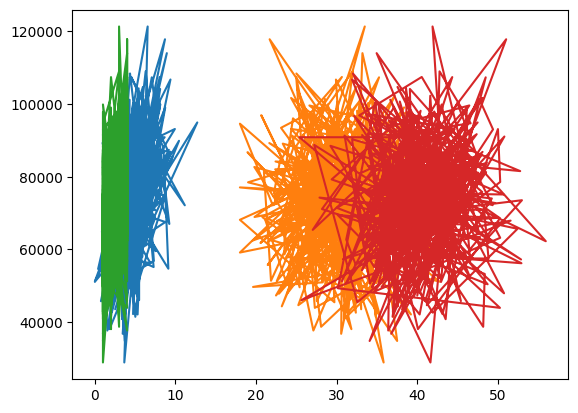

In [47]:
# step-5:checking the type of the data
plt.plot(x,y)

Since the data is non linear we go with polynomial features before using the feature we will go with standard scaler


In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)
std_scaler=StandardScaler()
std_train=std_scaler.fit_transform(xtrain)
poly=PolynomialFeatures(3)
xpoly_train=poly.fit_transform(std_train)
model=LinearRegression()
model.fit(xpoly_train,ytrain)
model.coef_
model.intercept_
std_test=std_scaler.transform(xtest)
poly_test=poly.transform(std_test)
ypred=model.predict(poly_test)
r2_score(ytest,ypred)
model.score(poly_test,ytest)





0.2500103329265798

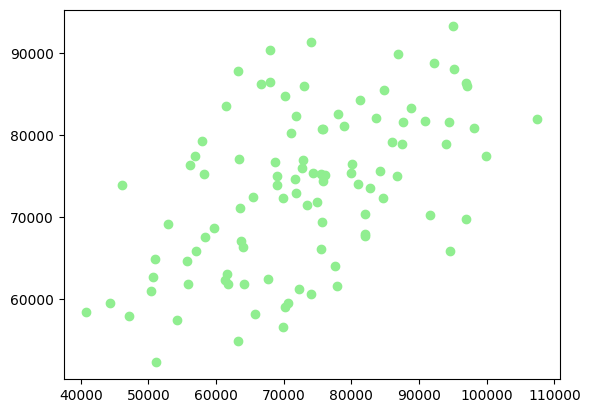

In [49]:
plt.scatter(ytest,ypred,color="lightgreen")